#Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
                                                             
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Get the data
- Required steps to follow:
  1. Connect google-collab to google drive
  2. Arrange the files according to directory tree as shown in Readme.md
  3. Add the created model to the directory and use it in deployment.


In [4]:
#pd.read_csv('file_name')
co2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine learning/Regression/Random Forest Regression/co2 emmissions/CO2 Emissions_Canada.csv')

In [5]:
co2.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


- List of all columns

In [6]:
co2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
#Input columns will be stored in x
#Output columns will be stored in y

x = co2[['Engine Size(L)', 'Cylinders','Fuel Consumption Comb (L/100 km)']]
y = co2['CO2 Emissions(g/km)']



#Split the train and test data

In [8]:
#Split the data with 40% of test size

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)



In [9]:
#create model of Random Forest regressor

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)


In [10]:
#Train the model

model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting Test Data

In [11]:
predictions = model.predict( X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

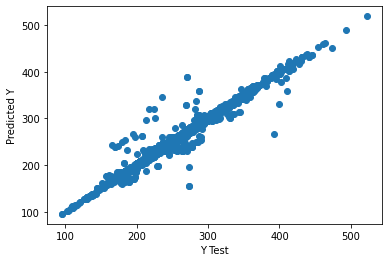

In [12]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [13]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.8684483200572553
MSE: 98.13377559937564
RMSE: 9.906249320473195


**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


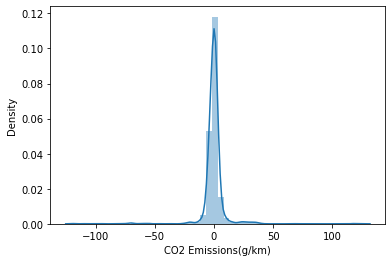

In [14]:
sns.distplot((y_test-predictions),bins=50)

In [15]:
#Store the model parameters using Pickle libraries

import pickle
pickle.dump(model, open('co2_model.pkl','wb'))
